<a href="https://colab.research.google.com/github/samyumobi/Image-object-detection-and-draw-/blob/main/Python_boundary_edge_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Boundary Detection

We can utilise open CV library  to detect objects in an image and draw bounding boxes, boundaries around objects.



In [37]:
import cv2

In [38]:
image = cv2.imread('/content/drive/MyDrive/AI_ML_Git/object detection4.png')

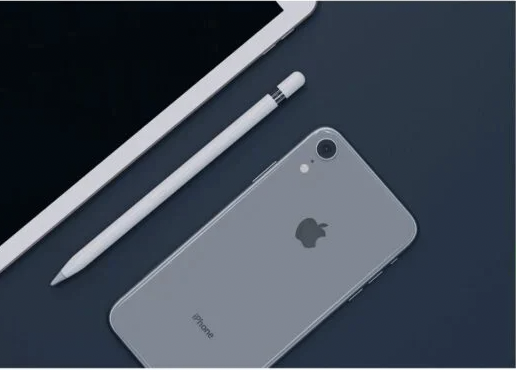

In [39]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

### **Approach to draw borders and contours:**

The pixels present in an image background form contour. The boundary pixels with same color and intensity are Contours.

We utilise the chain_approx_simple computer vision algorithm to detect contours and draw them.




Ref: https://learnopencv.com/contour-detection-using-opencv-python-c/





Number of Contours found = 32


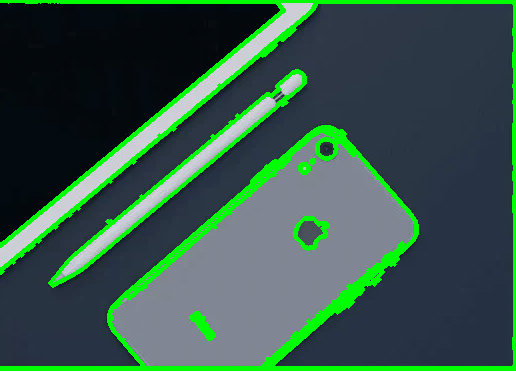

In [40]:
import cv2
import numpy as np

#Grayscale the image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)
  
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# 'Canny Edges After Contouring'  
# cv2_imshow(edged)
# cv2.waitKey(0)
  
print("Number of Contours found = " + str(len(contours)))
  
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

# 'Contours',   
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

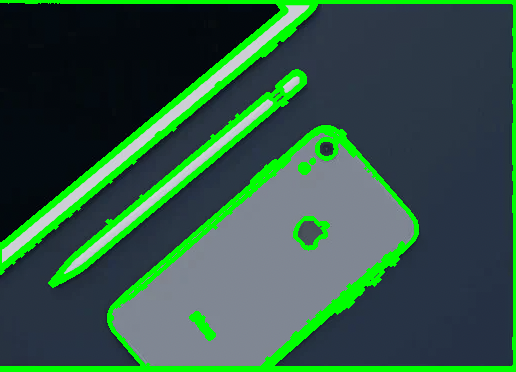

In [41]:
import cv2 # Computer vision library
 
# Read the color image
# image = cv2.imread("shapes-small.jpg")
 
# Make a copy
new_image = image.copy()
 
# Obtain Gray scale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 

 
# Convert the grayscale image to binary
ret, binary = cv2.threshold(gray, 150, 255, 
  cv2.THRESH_BINARY)
 

 
# To detect object contours, we want a black background and a white 
# foreground, so we invert the image (i.e. 255 - pixel value)
# inverted_binary = ~binary

 
# Find the contours on the inverted binary image, and store them in a list
# Contours are drawn around white blobs.
# hierarchy variable contains info on the relationship between the contours
contours, hierarchy = cv2.findContours(binary,
                                       cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_NONE)
     
# Draw the contours (in red) on the original image and display the result
# Input color code is in BGR (blue, green, red) format
# -1 means to draw all contours
image_copy1 = image.copy()
cv2.drawContours(image_copy1, contours, -1,(0,255,0),2,cv2.LINE_AA)

 
# Show the total number of contours that were detected
# print('Total number of contours detected: ' + str(len(contours)))
 

 
# Draw a bounding box around all contours
# for c in contours:
#   x, y, w, h = cv2.boundingRect(c)
 
#     # Make sure contour area is large enough
#   if (cv2.contourArea(c)) > 10:
#     cv2.rectangle(with_contours,(x,y), (x+w,y+h), (255,0,0), 5)
         
cv2_imshow(image_copy1)
cv2.waitKey(0)
cv2.destroyAllWindows()


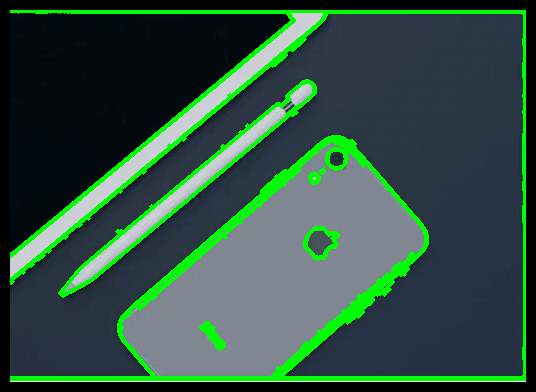

In [42]:
## Make border draws a border around the image
 
# Using cv2.copyMakeBorder() method
image = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, None, value = 0)
 
# Displaying the image
cv2_imshow(image)

### LIMITATIONS

Contour detection fails if the image background has same brightness. Unwanted contours and lines are clustered in background. The pixels in background are scattered, clustered, incomplete and multiple incorrect clusters will be present in background.

The Contour detection algorithms work fine for black and white images and images with darker backgrounds and images which are stretched.

If the pixels are of same intensity, interest. The background pixels are clustered.